In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path= r"C:\Users\DELL\Data-Visualization\raw_data\train.csv"
df = pd.read_csv(path)

Những cột cần xử lí

In [3]:
non_pred_cols= ['TARGET','ID',]
categorical_cols = ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START']
amount_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START']
cus_credit_cols= non_pred_cols + categorical_cols + amount_cols
df_prep = df[cus_credit_cols]


In [4]:
df_prep.describe()

,TARGET,ID,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START
count,215258.000000,215258.00000,2.152580e+05,2.152580e+05,215249.000000,2.150840e+05,215258.000000
mean,0.080731,107628.50000,1.688900e+05,5.994893e+05,27125.796166,5.387622e+05,12.064764
std,0.272422,62139.77646,2.745586e+05,4.027798e+05,14531.196505,3.698069e+05,3.264871
min,0.000000,0.00000,2.565000e+04,4.500000e+04,1980.000000,4.500000e+04,0.000000
25%,0.000000,53814.25000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,10.000000
50%,0.000000,107628.50000,1.440000e+05,5.135310e+05,24925.500000,4.500000e+05,12.000000
75%,0.000000,161442.75000,2.025000e+05,8.086500e+05,34636.500000,6.795000e+05,14.000000
max,1.000000,215257.00000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,23.000000


In [5]:
for col in cus_credit_cols:
    print(f'\n -----Tổng giá trị của biến: {df_prep[col].value_counts(ascending = False)}')
    


 -----Tổng giá trị của biến: TARGET
0    197880
1     17378
Name: count, dtype: int64

 -----Tổng giá trị của biến: ID
196348    1
57538     1
104849    1
26395     1
159713    1
         ..
136545    1
207150    1
41575     1
32747     1
121958    1
Name: count, Length: 215258, dtype: int64

 -----Tổng giá trị của biến: NAME_CONTRACT_TYPE
Cash loans         194860
Revolving loans     20398
Name: count, dtype: int64

 -----Tổng giá trị của biến: NAME_TYPE_SUITE
Unaccompanied      173985
Family              28107
Spouse, partner      7983
Children             2312
Other_B              1190
Other_A               605
Group of people       194
Name: count, dtype: int64

 -----Tổng giá trị của biến: WEEKDAY_APPR_PROCESS_START
TUESDAY      37724
WEDNESDAY    36270
MONDAY       35566
THURSDAY     35443
FRIDAY       35239
SATURDAY     23737
SUNDAY       11279
Name: count, dtype: int64

 -----Tổng giá trị của biến: AMT_INCOME_TOTAL
135000.0    25090
112500.0    21743
157500.0    18592
180000.0

# **STEP 1: DATA UNDERSTANDING**

## **I. DATA DESCRIPTION**

#### **A. Identification and Target Variables**

##### **`ID`:**
This is the primary key for data management. In practice, the ID allows the bank to link this single loan application record with the customer’s entire historical ecosystem (e.g., credit bureau reports, past transactions, family details), ensuring data integrity across different systems.(100% unique value)

##### **`TARGET`:**
This represents the bank's official Default Definition. It signifies the risk event the institution aims to predict and mitigate. Accurately predicting the TARGET helps the bank optimize the approval process:
* Approve potential TARGET=0 applicants 
* Reject potential TARGET=1 applicants, thus protecting profitability.

#### **B. Loan and Product Description Variables**

##### **`NAME_CONTRACT_TYPE`(Loan account type):**
This variable immediately segregates risk by product type.
* Cash Loans generally carry higher risk because the purpose of use is flexible and not tightly controlled by the bank (e.g., used for speculation or non-essential spending).
* Revolving Loans may have lower immediate default rates but carry a risk of perpetual debt (customers repeatedly paying only the minimum due).

##### **`AMT_CREDIT`(Approved loan amount):**

Reflects the bank's Exposure at Default. This is the actual amount of capital the bank stands to lose if the customer defaults. It is used to determine the customer’s Loan Cap based on the bank's internal risk tolerance and regulatory requirements.

##### **`AMT_ANNUITY`(Monthly installment amount):**

A crucial component for calculating Affordability. Banks use this amount to ensure the required monthly repayment fits within the customer's financial capacity, primarily gauged through the Debt-to-Income Ratio (DTI). A high Annuity relative to income signals high financial stress.

##### **`AMT_GOODS_PRICE`(Value of the item):**

If the loan is tied to an asset purchase, this indicates the Loan Purpose and the Value of the Collateral (if secured). It helps underwriters assess the reasonableness of the approved loan amount ($AMT\_CREDIT$) compared to the underlying asset's value.

#### **C. Financial, Social, and Temporal Variables**

##### **`AMT_INCOME_TOTAL`(Total monthly income):**

The main indicator of the Repayment Source. High and stable income is the most fundamental factor for loan approval. Banks use income to calculate the customer's Leverage Ratio ($AMT\_CREDIT / AMT\_INCOME\_TOTAL$), which is key to assessing over-indebtedness.

##### **`NAME_TYPE_SUITE`(Accompanying person when submitting application):**

Provides a proxy for the customer's Social Support Network. An applicant accompanied by family or a spouse may be viewed as having a better emotional or financial safety net during periods of financial difficulty, potentially acting as a minor risk mitigator.
##### **`WEEKDAY_APPR_PROCESS_START`(Application submission date):**

Primarily used for bank operational analysis (e.g., peak application days). Its predictive power is usually low, but it can occasionally capture minor behavioral patterns.

##### **`HOUR_APPR_PROCESS_START`(Application submission time):**

A subtle behavioral risk indicator. Applications submitted at "non-standard hours" (very early or late) can signal financial urgency or an unstable work schedule (e.g., shift work or high job instability). It helps the risk model capture hidden risk patterns linked to lifestyle stability.



## **II. DATA DISTRIBUTION ANALYSIS**

### **1. Target feature**

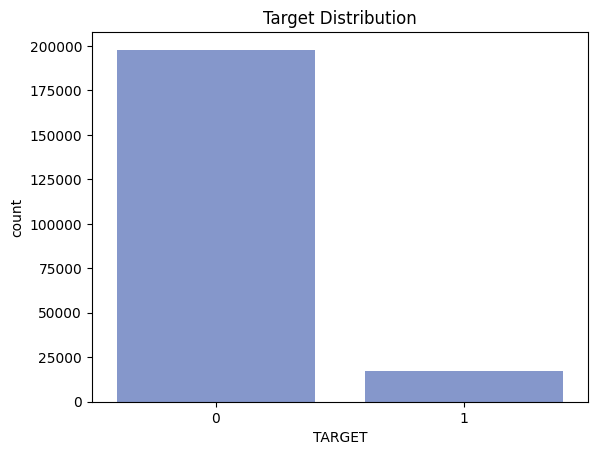

In [6]:
sns.countplot(data=df_prep, x='TARGET', color = "#7A92D6" )
plt.title("Target Distribution")
plt.show()

`ID is unique value(100%) -> No meaningful distribution`

### **2. Categorical features**

In [7]:
import sys
sys.path.append(r'C:\Users\DELL\Data-Visualization\processing')
from function import * 

#### **2.1 Nominal variables**

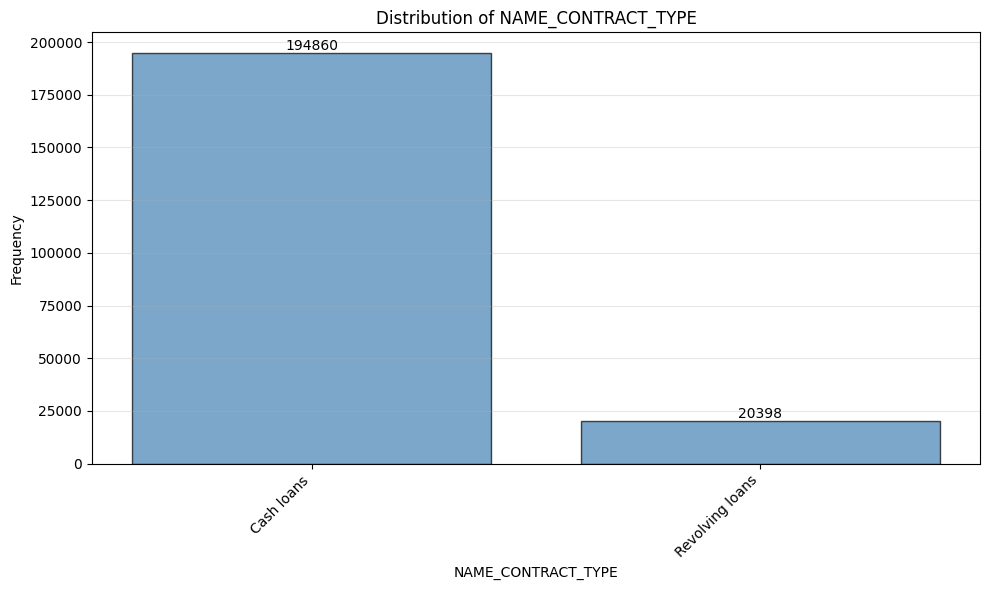

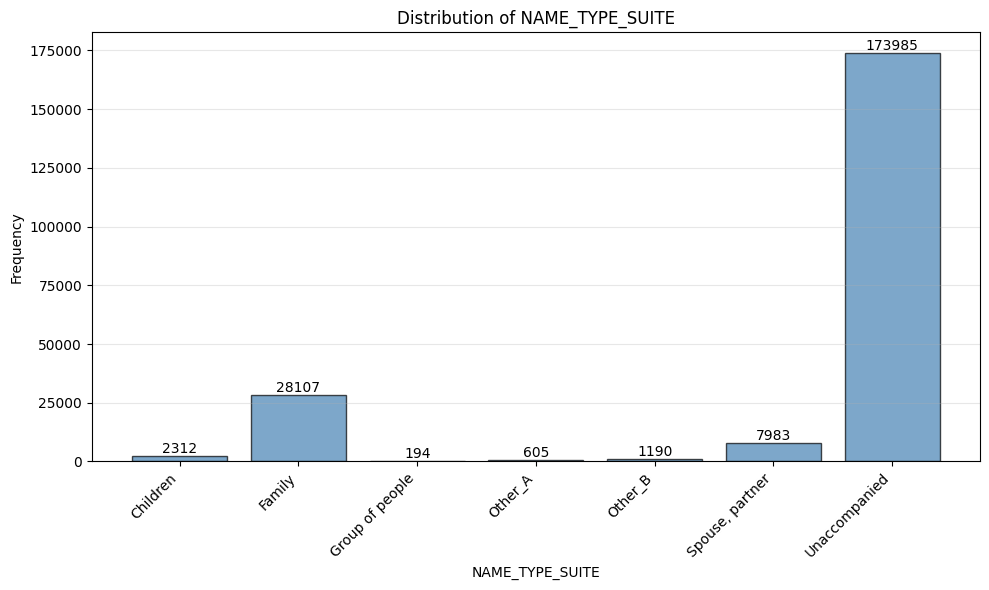

In [8]:
#DISTRIBUTION OF NOMINAL CATEGORICAL FEATURES
cat_cols = ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE']

for col in cat_cols:
    plot_discrete_barchart(df_prep[col], 
                           title=f"Distribution of {col}")

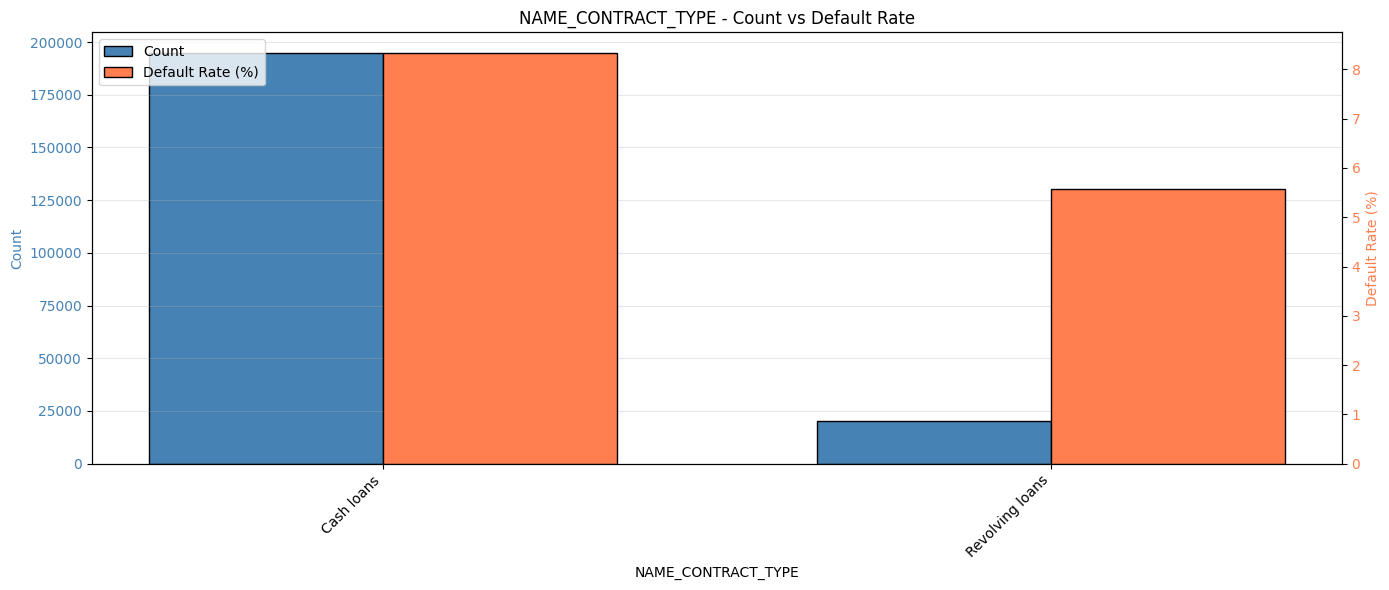

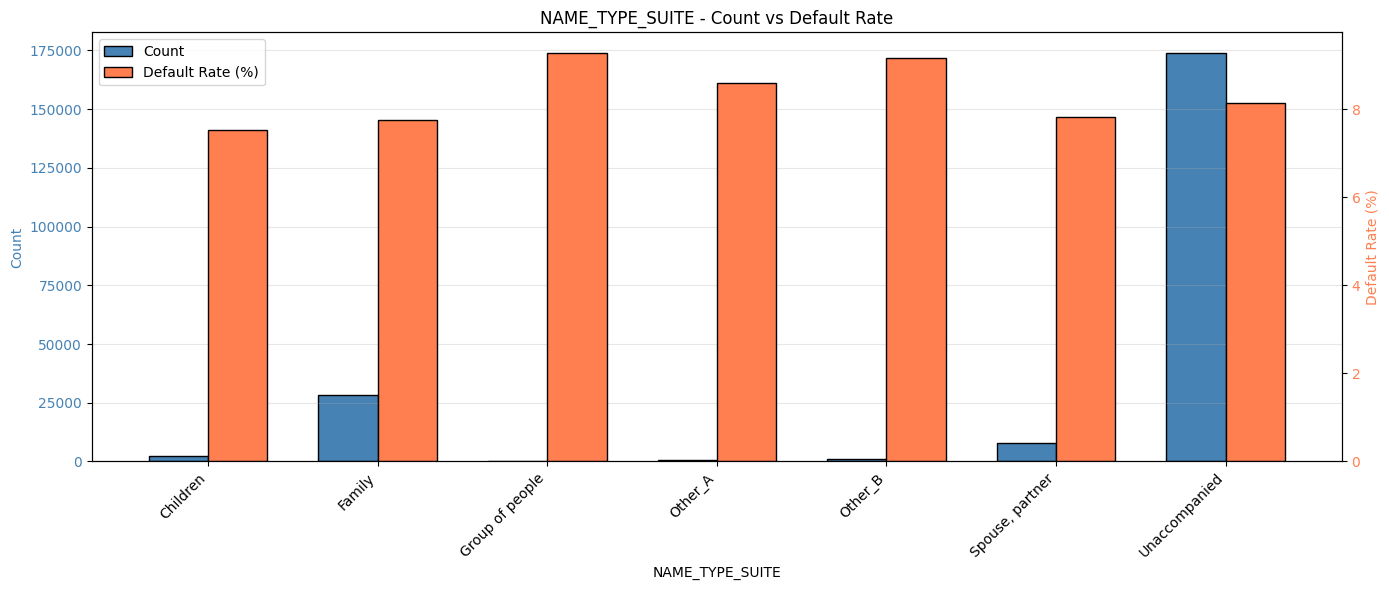

In [9]:
# DISTRIBUTION OF NOMINAL CATEGORICAL FEATURES VS TARGET
for col in cat_cols:
    plot_grouped_bar_vs_target(df_prep, feature=col, target='TARGET')

In [10]:
#METRICS CATEGORICAL VARIABLES VS TARGET
results1 = [] 

for col in cat_cols:
    df_metrics = calculate_target_relationship_nominal(
        data=df_prep,    # DataFrame đầy đủ
        feature=col,     # tên cột categorical
        target='TARGET'  # tên cột target, là string
    )
    results1.append(df_metrics)

# Gộp tất cả metrics lại
categorical_metrics_df = pd.concat(results1, ignore_index=True)
categorical_metrics_df


,Feature,Unique_Values,Chi2_Statistic,Chi2_P_Value,Cramers_V,Information_Value,Mutual_Information
0,NAME_CONTRACT_TYPE,2,189.991678,3.192622e-43,0.029709,0.013827,0.000487
1,NAME_TYPE_SUITE,7,9.482746,1.481933e-01,0.006651,0.000590,0.000022


#### **2.2 Ordinal variables**

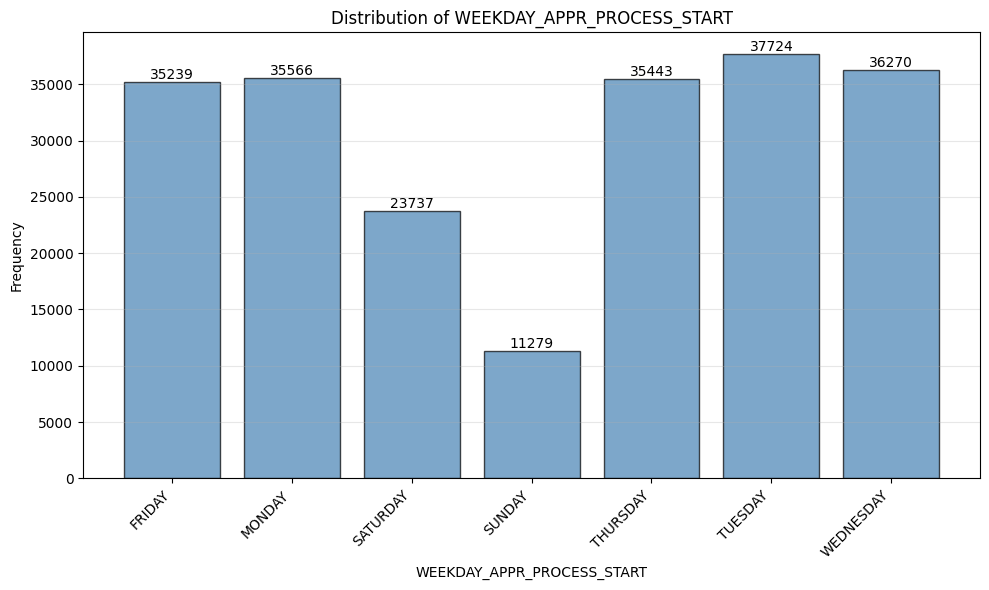

In [11]:

plot_discrete_barchart(df_prep['WEEKDAY_APPR_PROCESS_START'], 
                           title=f"Distribution of WEEKDAY_APPR_PROCESS_START")

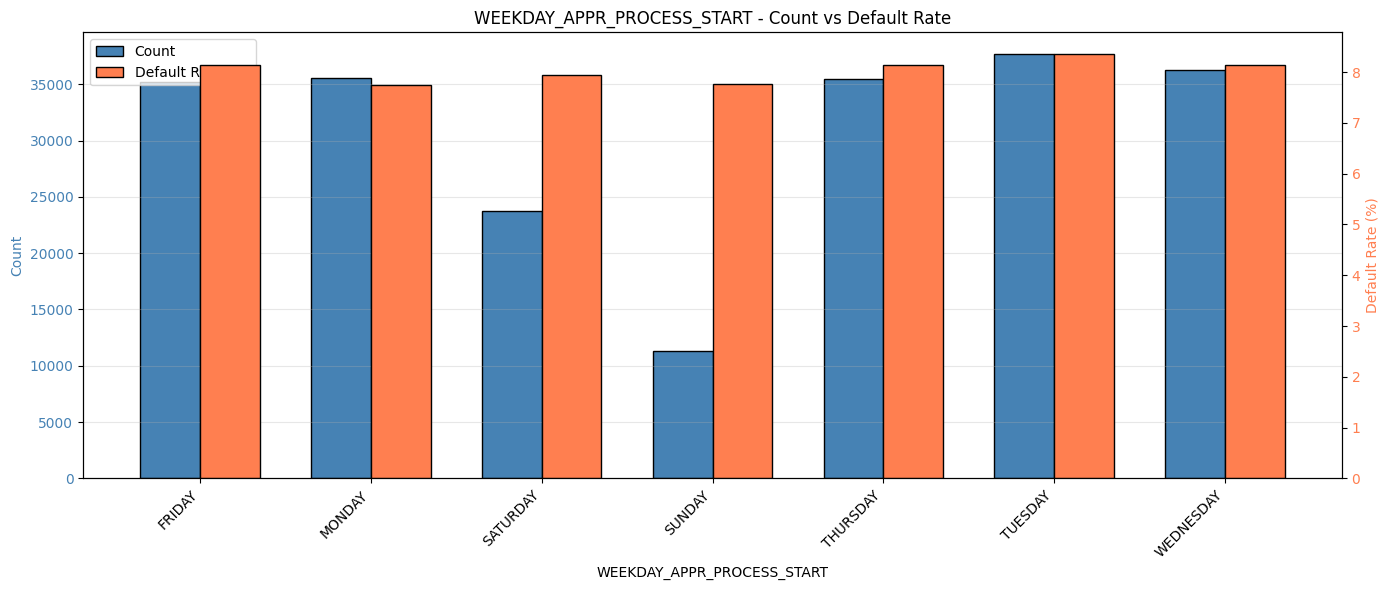

In [12]:
plot_grouped_bar_vs_target(df_prep, feature='WEEKDAY_APPR_PROCESS_START', target='TARGET')

In [13]:
results2 = []

df2_metrics = calculate_target_relationship_ordinal(
    data=df_prep,                           
    feature='WEEKDAY_APPR_PROCESS_START',      
    target='TARGET'                            
)
results2.append(df2_metrics)

# Gộp lại thành 1 DataFrame
ordinal_metrics_df = pd.concat(results2, ignore_index=True)
ordinal_metrics_df


,Feature,Spearman_Correlation,Spearman_P_Value,Point_Biserial_Correlation,Point_Biserial_P_Value
0,WEEKDAY_APPR_PROCESS_START,0.003832,0.075449,0.004085,0.058054


### **3. Numerical features**

#### **3.1 Continuos variance**

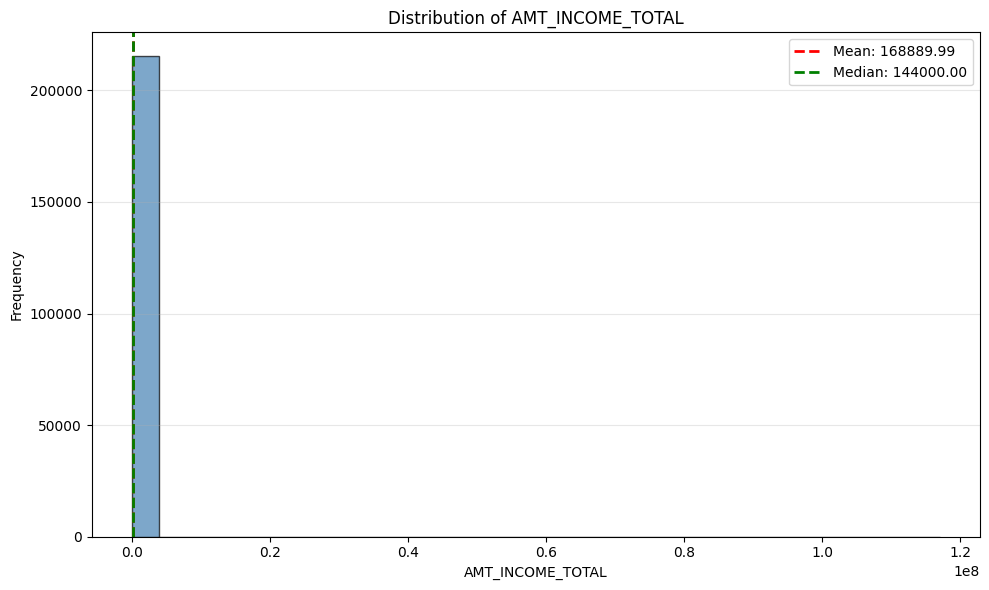

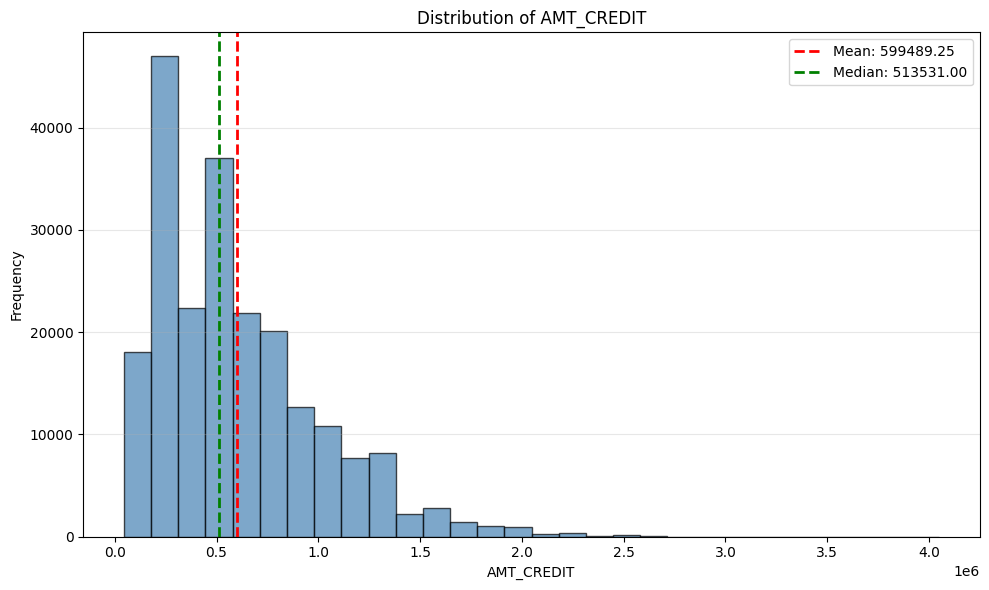

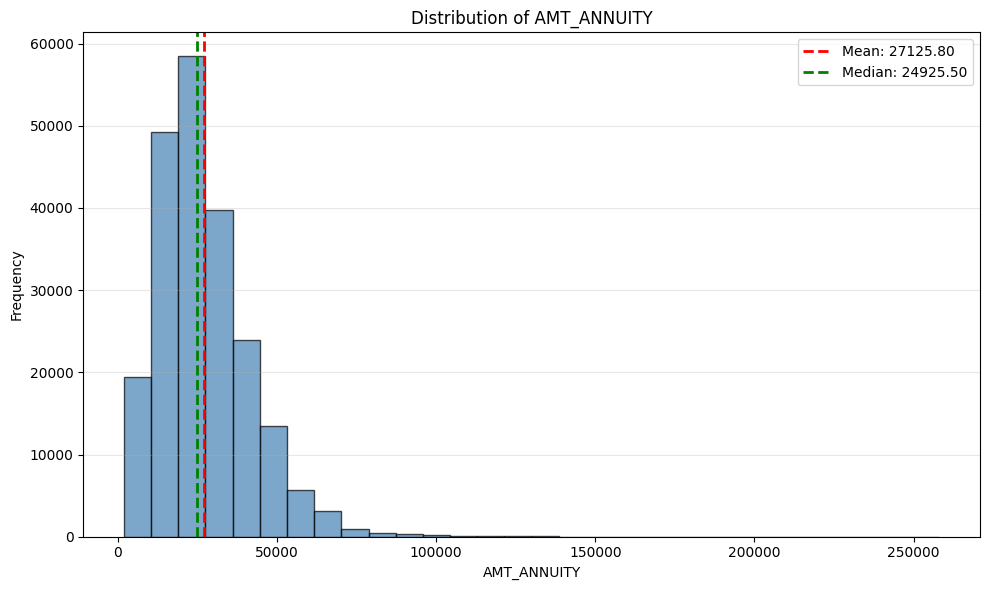

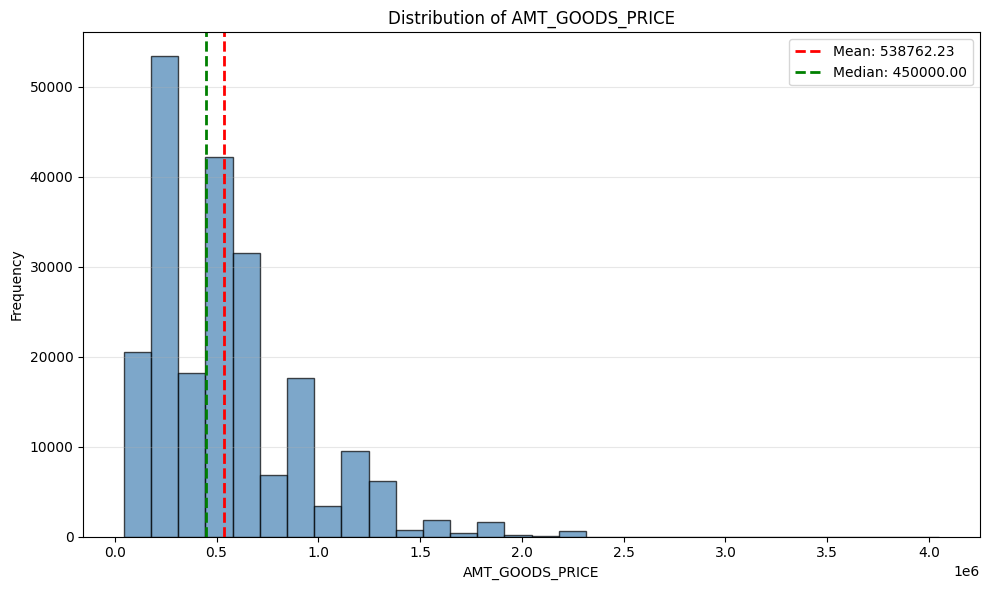

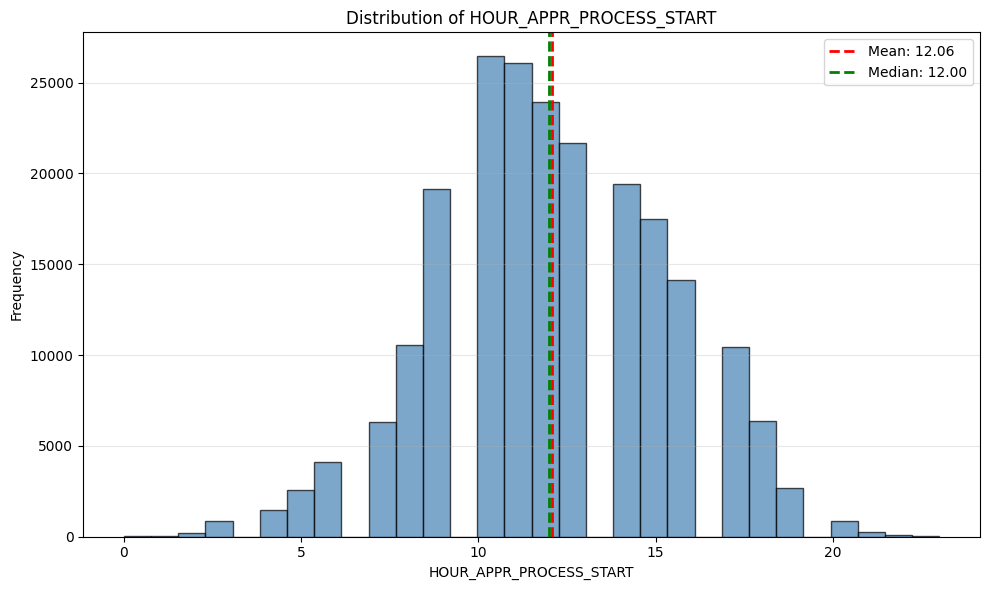

In [14]:
#DISTRIBUTION OF CONTINOUS NUMERICAL FEATURES 
num_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START']

for col in num_cols:
    plot_continuous_histogram(df_prep[col], 
                              title=f"Distribution of {col}")


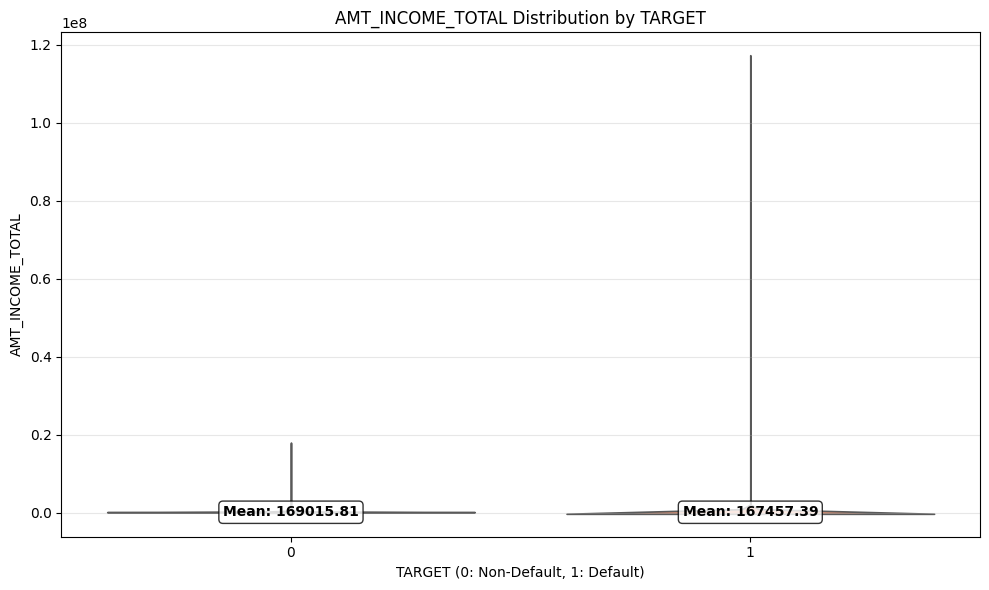

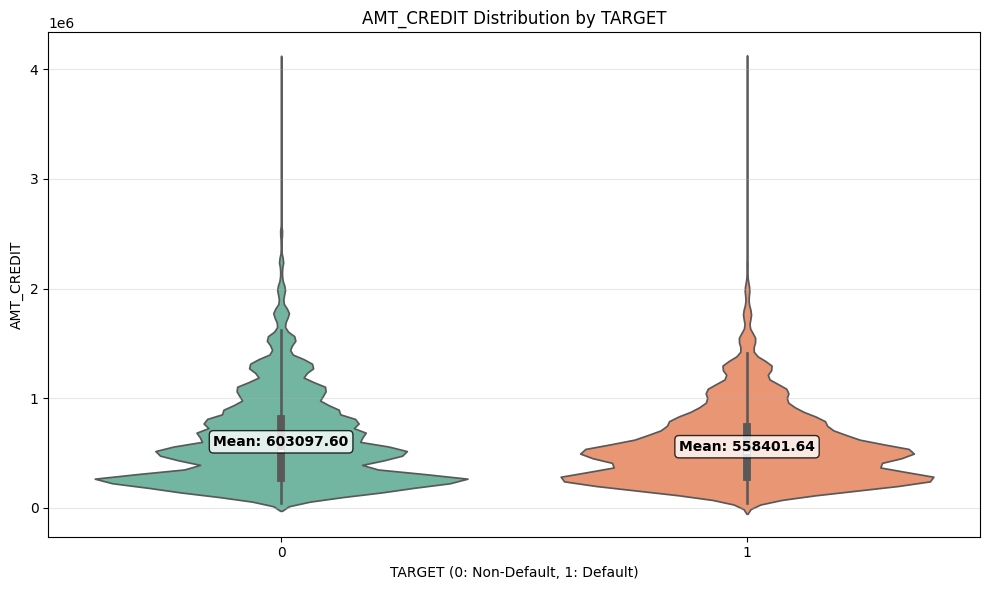

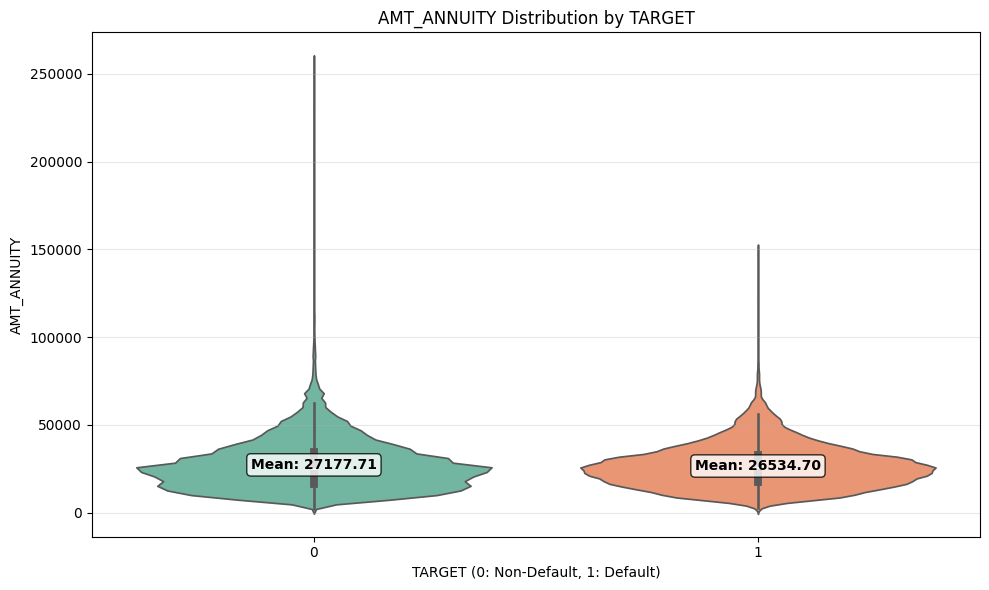

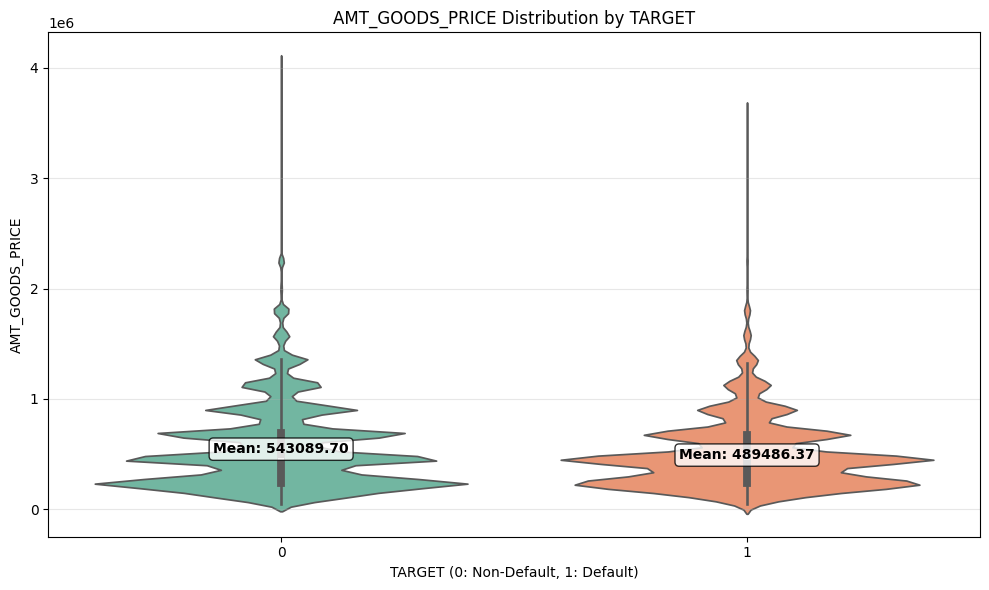

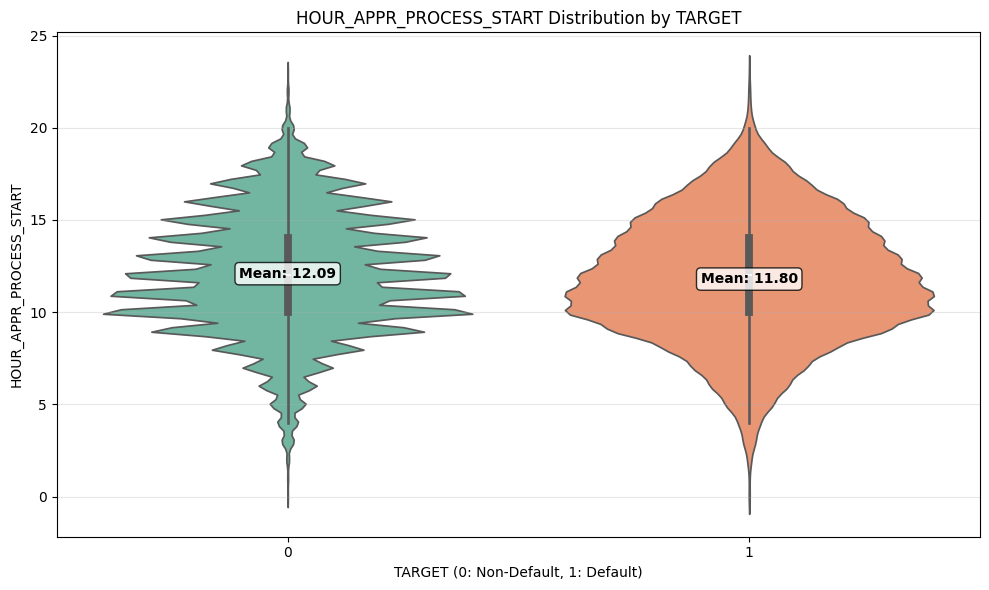

In [15]:
# DISTRIBUTION OF CONTINUOS NUMERICAL FEATURES VS TARGET
for col in num_cols:
    plot_continuous_violin_vs_target(df_prep,
                                    feature=col,     
                                    target='TARGET')


In [16]:
#METRICS CONTINUOUS VARIABLES VS TARGET
results3 = []  # lưu kết quả từng cột

for col in num_cols:
    df_metrics = calculate_continuous_metrics(df_prep[col], target=df_prep['TARGET'])
    results3.append(df_metrics)

# Gộp tất cả metrics lại thành 1 DataFrame
continuous_metrics_df = pd.concat(results3, ignore_index=True)
continuous_metrics_df

,Feature,Count,Missing,Mean,Median,Std,Min,Max,Skewness,Kurtosis,ANOVA_F_Statistic,ANOVA_P_Value
0,AMT_INCOME_TOTAL,215258,0,168889.994382,144000.0,274558.634675,25650.0,117000000.0,359.709190,152401.847230,0.514680,4.731205e-01
1,AMT_CREDIT,215258,0,599489.252871,513531.0,402779.828783,45000.0,4050000.0,1.229950,1.916856,196.896813,1.039401e-44
2,AMT_ANNUITY,215249,9,27125.796166,24925.5,14531.196505,1980.0,258025.5,1.607455,8.067887,31.284934,2.230713e-08
3,AMT_GOODS_PRICE,215084,174,538762.234918,450000.0,369806.933921,45000.0,4050000.0,1.347467,2.438124,335.893294,5.708037e-75
4,HOUR_APPR_PROCESS_START,215258,0,12.064764,12.0,3.264871,0.0,23.0,-0.027358,-0.193191,128.559807,8.632318e-30


#### **3.2 Discrete variance**

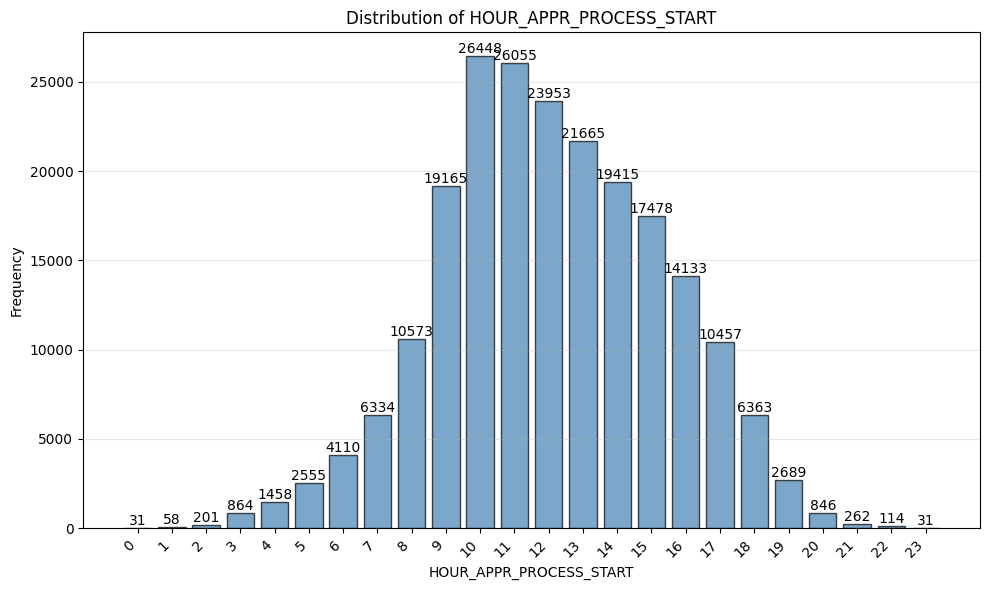

In [17]:
#DISTRIBUTION OF HOUR_APPR_PROCESS_START
plot_discrete_barchart(df_prep['HOUR_APPR_PROCESS_START'],
                       title = f"Distribution of HOUR_APPR_PROCESS_START")

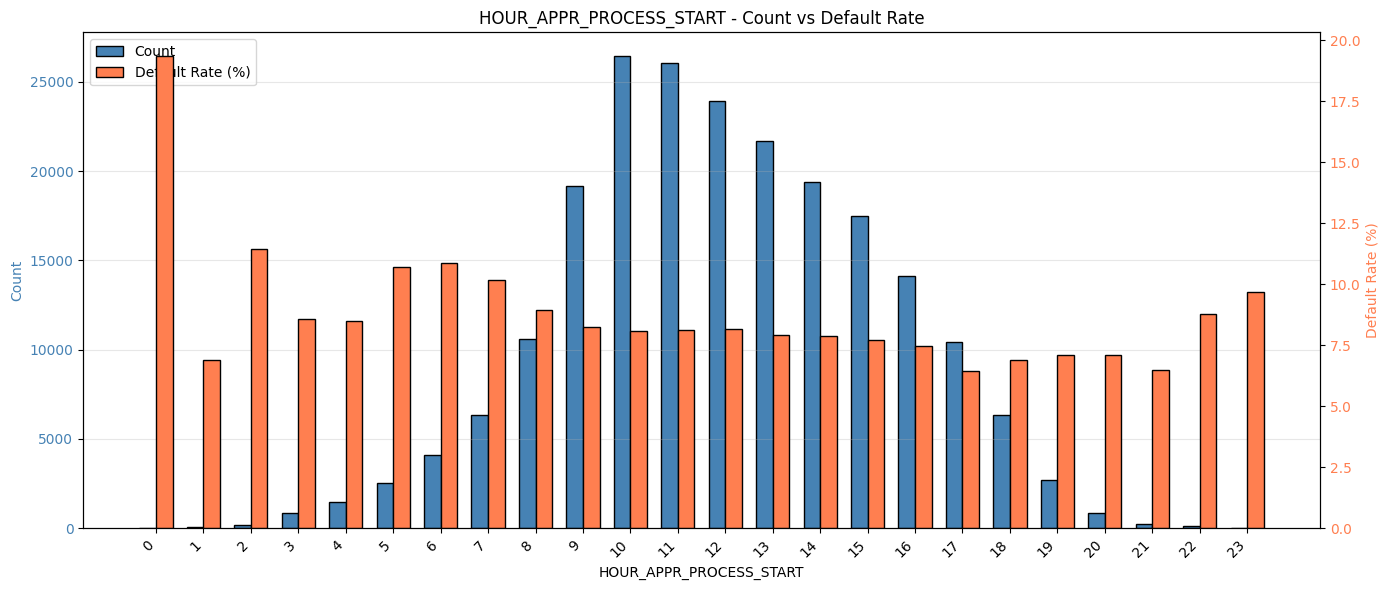

In [18]:
#DISTRIBUTION OF HOUR_APPR_PROCESS_START VS TARGET
plot_grouped_bar_vs_target(df_prep, 
                           feature='HOUR_APPR_PROCESS_START', 
                           target='TARGET')

In [19]:
#METRICS HOUR_APPR_PROCESS_START VS TARGET
results4 = []  # lưu kết quả từng cột   
df4_metrics = calculate_target_relationship_discrete_few_nunique(data=df_prep,
                                                                 feature='HOUR_APPR_PROCESS_START',
                                                                 target='TARGET'                            
)
results4.append(df4_metrics)
# Gộp lại thành 1 DataFrame
hour_appr_metrics_df = pd.concat(results4, ignore_index=True)
hour_appr_metrics_df


,Feature,Unique_Values,Chi2_Statistic,Chi2_P_Value,Cramers_V
0,HOUR_APPR_PROCESS_START,24,190.192106,2.790494e-28,0.029725


### **`VALIDITY & CHECK INCONSISTENCIES`**

In [20]:
# Dictionary to store inconsistency check results
inconsistency_results = {}

# ==============================================================================
# 1. IDENTIFIER AND TARGET VARIABLE CHECKS
# ==============================================================================

# 1.1. ID (Uniqueness Check)
id_duplicates = df['ID'].duplicated().sum()
inconsistency_results['ID_Duplicates'] = id_duplicates

# 1.2. TARGET (Binary Range Check)
target_inconsistencies = len(df[~df['TARGET'].isin([0, 1])])
inconsistency_results['TARGET_Invalid_Values'] = target_inconsistencies

# ==============================================================================
# 2. NUMERICAL VARIABLE CHECKS (Sign and Range)
# ==============================================================================

# 2.1. Check for Negative Values (Illogical)
for col in amount_cols:
    negative_count = len(df[df[col] < 0])
    inconsistency_results[f'{col}_Negative'] = negative_count

# 2.2. Check HOUR_APPR_PROCESS_START (Range 0-23)
hour_inconsistencies = len(df[~df['HOUR_APPR_PROCESS_START'].between(0, 23)])
inconsistency_results['HOUR_APPR_PROCESS_START_Invalid'] = hour_inconsistencies

# ==============================================================================
# 3. CATEGORICAL VARIABLE CHECKS (NaN and Validity)
# ==============================================================================

# 3.1. Check for NaN (Missing Values)
categorical_cols = ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START']
for col in categorical_cols:
    nan_count = df[col].isnull().sum()
    inconsistency_results[f'{col}_Missing_Values'] = nan_count

# 3.2. Check for Invalid Categorical Labels (e.g., typos in weekdays)
valid_weekdays = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']
weekday_inconsistencies = len(df[~df['WEEKDAY_APPR_PROCESS_START'].isin(valid_weekdays) & df['WEEKDAY_APPR_PROCESS_START'].notnull()])
inconsistency_results['WEEKDAY_APPR_PROCESS_START_Invalid_Labels'] = weekday_inconsistencies


# ==============================================================================
# 4. RELATIONAL INCONSISTENCY CHECKS
# ==============================================================================

# 4.1. Inconsistency 1: High Debt-to-Income Ratio (DTI)
# Logic: If the monthly installment (AMT_ANNUITY) is too high relative to income.
# A ratio above 1.0 is highly suspect (taking up > 100% of declared income).
df['DTI_RATIO'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
high_dti_inconsistencies = len(df[df['DTI_RATIO'] > 0.5]) # Example: DTI > 50% is considered significantly high risk
extreme_dti_inconsistencies = len(df[df['DTI_RATIO'] > 1.0]) # Example: DTI > 100% is often a data error or extreme risk
inconsistency_results['DTI_Above_50_Percent'] = high_dti_inconsistencies
inconsistency_results['DTI_Above_100_Percent'] = extreme_dti_inconsistencies

# 4.2. Inconsistency 2: Missing Goods Price when Credit is Granted
# Logic: We check cases where AMT_CREDIT is positive, but AMT_GOODS_PRICE is missing (NaN).
# This is common for Revolving Loans, but worth noting for data completeness.
goods_price_missing_and_credit_present = len(df[(df['AMT_CREDIT'] > 0) & (df['AMT_GOODS_PRICE'].isnull())])
inconsistency_results['AMT_GOODS_PRICE_Missing_When_Credit_Exists'] = goods_price_missing_and_credit_present

# ==============================================================================
# PRINT RESULTS
# ==============================================================================
print("\n" + "="*50)
print("VALIDITY CHECK INCONSISTENCIES SUMMARY")
print("="*50)

for check, count in inconsistency_results.items():
    if count > 0:
        print(f"🔴 {check:<50}: {count} records affected")
    else:
        print(f"✅ {check:<50}: {count} records affected")


VALIDITY CHECK INCONSISTENCIES SUMMARY
✅ ID_Duplicates                                     : 0 records affected
✅ TARGET_Invalid_Values                             : 0 records affected
✅ AMT_INCOME_TOTAL_Negative                         : 0 records affected
✅ AMT_CREDIT_Negative                               : 0 records affected
✅ AMT_ANNUITY_Negative                              : 0 records affected
✅ AMT_GOODS_PRICE_Negative                          : 0 records affected
✅ HOUR_APPR_PROCESS_START_Negative                  : 0 records affected
✅ HOUR_APPR_PROCESS_START_Invalid                   : 0 records affected
✅ NAME_CONTRACT_TYPE_Missing_Values                 : 0 records affected
🔴 NAME_TYPE_SUITE_Missing_Values                    : 882 records affected
✅ WEEKDAY_APPR_PROCESS_START_Missing_Values         : 0 records affected
✅ WEEKDAY_APPR_PROCESS_START_Invalid_Labels         : 0 records affected
🔴 DTI_Above_50_Percent                              : 1769 records affected
🔴 DTI_

### **`MULTIVARIATE ANALYSIS`**

Correlation Matrix - Heatmap

<Axes: >

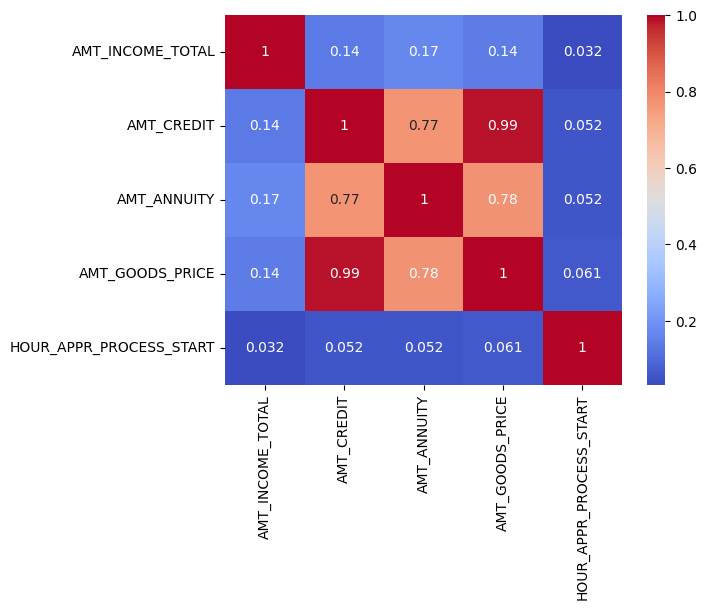

In [21]:
corr_matrix = df_prep[amount_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

# **STEP 2: DATA CLEANING**

In [22]:
sys.path.append(r'C:\Users\DELL\Data-Visualization\src')
from preprocess_v5 import *


## **I. HANDLING MISSING VALUES**

In [23]:
# Missing count and percentage
missing_summary = pd.DataFrame({
    'missing_count': df_prep[cus_credit_cols].isnull().sum(),
    'missing_percent': df_prep[cus_credit_cols].isnull().mean() * 100
})
missing_summary

,missing_count,missing_percent
TARGET,0,0.000000
ID,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
NAME_TYPE_SUITE,882,0.409741
WEEKDAY_APPR_PROCESS_START,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
AMT_CREDIT,0,0.000000
AMT_ANNUITY,9,0.004181
AMT_GOODS_PRICE,174,0.080833
HOUR_APPR_PROCESS_START,0,0.000000


In [34]:
# NAME_TYPE_SUITE
df_prep['NAME_TYPE_SUITE'] = df_prep['NAME_TYPE_SUITE'].fillna('Unknown')
df_prep['NAME_TYPE_SUITE'] = df_prep['NAME_TYPE_SUITE'].astype('category')
        
# AMT_GOODS_PRICE
df_prep['GOODS_PRICE_WAS_MISSING'] = df_prep['AMT_GOODS_PRICE'].isnull().astype(float)
df_prep['AMT_GOODS_PRICE'] = df_prep['AMT_GOODS_PRICE'].fillna(df_prep['AMT_CREDIT'])
        
# AMT_ANNUITY
df_prep['AMT_ANNUITY_WAS_MISSING'] = df_prep['AMT_ANNUITY'].isnull().astype(float)
df_prep['AMT_ANNUITY'] = df_prep['AMT_ANNUITY'].fillna(df_prep['AMT_ANNUITY'].median())

In [41]:
df_prep.isnull().sum()

TARGET                        0
ID                            0
NAME_CONTRACT_TYPE            0
NAME_TYPE_SUITE               0
WEEKDAY_APPR_PROCESS_START    0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
HOUR_APPR_PROCESS_START       0
GOODS_PRICE_WAS_MISSING       0
AMT_ANNUITY_WAS_MISSING       0
dtype: int64

## **II. HANDLING OUTLIERS**

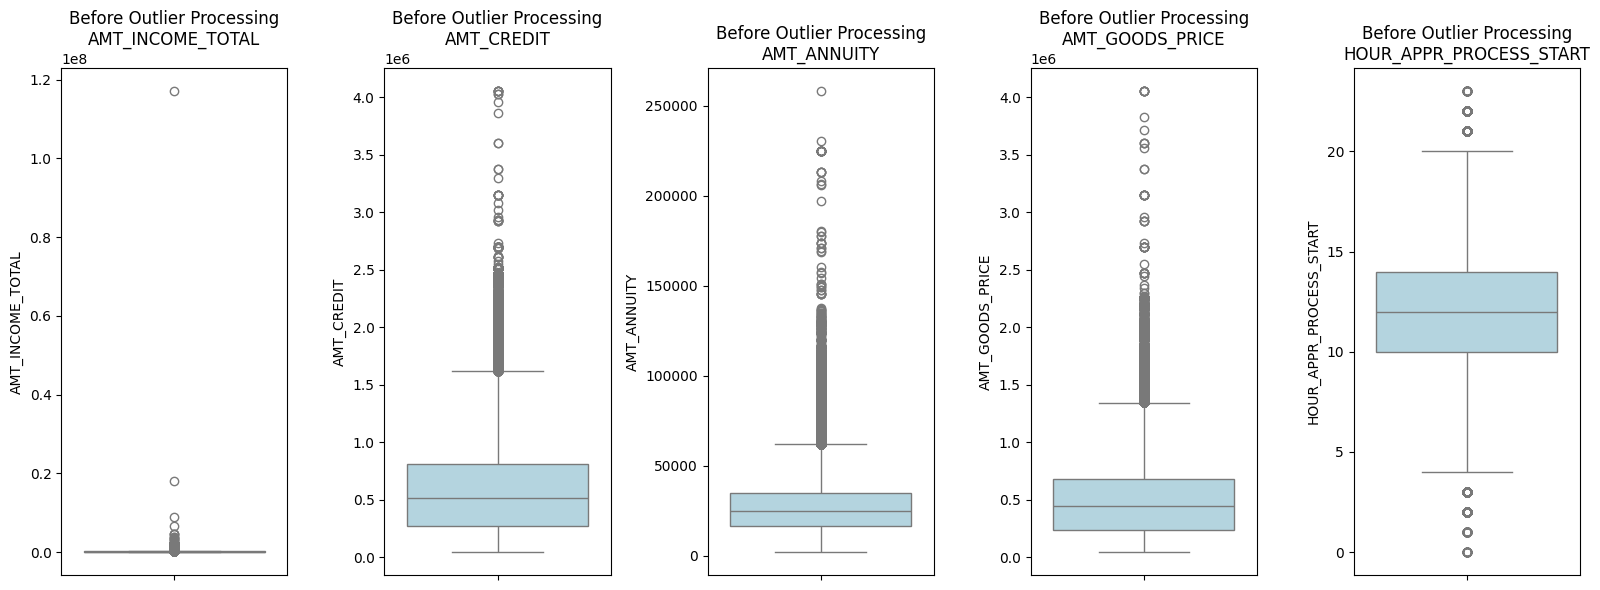

In [35]:
# Vẽ boxplot trước khi xử lý
plt.figure(figsize=(16, 6))
for i, col in enumerate(amount_cols):
    plt.subplot(1, len(amount_cols), i+1)
    sns.boxplot(y=df_prep[col], color='lightblue')
    plt.title(f'Before Outlier Processing\n{col}')
plt.tight_layout()
plt.show()

### `CHECK OUTLIER`

In [36]:
# Khởi tạo class
outlier_processor = AmountOutlierProcessor()

# Fit trên dataframe
outlier_processor.fit(df_prep)  # df_prep là dataframe bạn đang dùng

# Transform (thay thế giá trị outlier và tạo cột flag)
df_processed = outlier_processor.transform(df_prep)

# Kiểm tra kết quả
df_processed.head()

,TARGET,ID,NAME_CONTRACT_TYPE,NAME_TYPE_SUITE,WEEKDAY_APPR_PROCESS_START,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,GOODS_PRICE_WAS_MISSING,AMT_ANNUITY_WAS_MISSING,AMT_INCOME_TOTAL_outlier,AMT_CREDIT_outlier,AMT_ANNUITY_outlier,AMT_GOODS_PRICE_outlier
0,0,196348,Cash loans,Unaccompanied,WEDNESDAY,225000.0,785398.5,33403.5,702000.0,11,0.0,0.0,0,0,0,0
1,0,147976,Cash loans,Unaccompanied,WEDNESDAY,90000.0,592560.0,35937.0,450000.0,10,0.0,0.0,0,0,0,0
2,0,52662,Revolving loans,Unaccompanied,MONDAY,126000.0,202500.0,10125.0,202500.0,13,0.0,0.0,0,0,0,0
3,0,101577,Cash loans,Unaccompanied,TUESDAY,157500.0,254700.0,18531.0,225000.0,9,0.0,0.0,0,0,0,0
4,0,173078,Cash loans,Unaccompanied,WEDNESDAY,540000.0,1252363.5,47830.5,1152000.0,19,0.0,0.0,0,0,0,0


In [56]:
# Khởi tạo class
hour_binner = HourBinner()

# Fit và transform
df_binned = hour_binner.fit_transform(df_prep)

# Kiểm tra kết quả
df_binned[['HOUR_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_BIN']].head()

,HOUR_APPR_PROCESS_START,HOUR_APPR_PROCESS_BIN
0,11,Morning
1,10,Morning
2,13,Afternoon
3,9,Morning
4,19,Evening


**ANALYSIS**

* Initially, the `HOUR_APPR_PROCESS_START` variable has 24 distinct values ​​(0–23). When binned into 4 groups (“Late_Night”, “Morning”, “Afternoon”, “Evening”), the number of categories is reduced to 4.
-> This makes the machine learning model easier to learn and reduces the clutter when visualizing the data.

* Hour groups help to observe trends by time frame, for example default rate by hour group(0-4h). With 24 individual values, trends can be difficult to see, but with 4 hour groups, the pattern becomes clearer.

* Rare hours (e.g. 0h or 23h) can create outliers or noise. Binning hours helps to group less frequent values ​​into a common group, reducing the impact on the model.

* The HOUR_APPR_PROCESS_BIN variable can be:

    * One-hot encoded for logistic regression or linear models.

    * Label encoded or directly categorized for tree-based models.
-> Thus, binning now reduces overfitting and preserves important information.

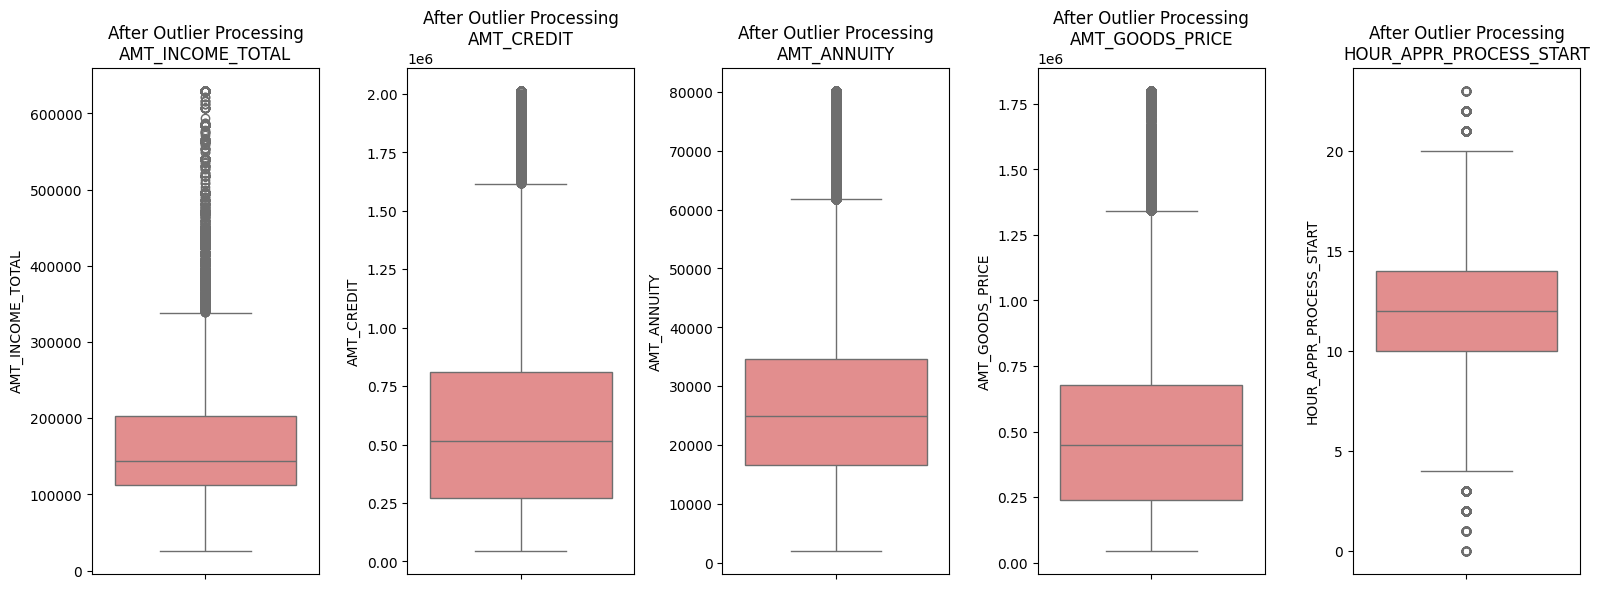

In [38]:
outlier_processor = AmountOutlierProcessor()
df_outlier = outlier_processor.fit_transform(df_prep.copy())

# Vẽ boxplot sau khi xử lý
plt.figure(figsize=(16, 6))
for i, col in enumerate(amount_cols):
    plt.subplot(1, len(amount_cols), i+1)
    sns.boxplot(y=df_outlier[col], color='lightcoral')
    plt.title(f'After Outlier Processing\n{col}')
plt.tight_layout()
plt.show()

**Nhận xét:**
* `AMT_INCOME_TOTAL`: có một số khách hàng siêu giàu(doanh nhân lớn)-> Outlier nằm rất xa-> Giữ lại các vị khách này vì thường là khách VIP, thường có tỉ lệ vỡ nợ thấp hơn
* `AMT_CREDIT`: khoản vay cực lớn, thường là mua nhà, xe sang hoặc doanh nghiệp nhỏ vay vốn
* `AMT_GOODS_PRICE`: tương tự AMT_CREADIT, nhưng outlier có nhiều hơn một chút do có vài trường hợp giá hàng hóa bị ghi nhầm hoặc thực sự đắt đỏ
* `HOUR_APPR_PROCESS_START`: giờ nộp hồ sơ bất thường(0h-4h sáng)-> Đây là hành vi đáng nghi liên quan đến hành vi gian lận

### **`HANDLING INCONSISTENCIES`**

# **STEP 3: DATA TRANSFORMATION**

In [45]:
# 1. Khởi tạo encoder, chỉ định các cột One-Hot Encoding
# NAME_CONTRACT_TYPE: Có 2 danh mục
# NAME_TYPE_SUITE: Có 4-8 danh mục (tùy thuộc xử lý NaN)
encoder = FlexibleCategoricalEncoder(
    onehot_encode_cols=['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE'],
    # drop='first' để tránh đa cộng tuyến (collinearity)
    onehot_drop='first', 
    handle_unknown='ignore' 
)

# 2. Fit và Transform dữ liệu
df_encoded = encoder.fit_transform(df_outlier.copy())

# Kiểm tra các cột mới đã được tạo
print("Các cột mới được tạo sau One-Hot Encoding:")
print([col for col in df_encoded.columns if 'NAME_CONTRACT_TYPE_' in col or 'NAME_TYPE_SUITE_' in col])

One-hot encoding: NAME_CONTRACT_TYPE (2 categories)
One-hot encoding: NAME_TYPE_SUITE (8 categories)
Các cột mới được tạo sau One-Hot Encoding:
['NAME_CONTRACT_TYPE_Revolving loans', 'NAME_TYPE_SUITE_Family', 'NAME_TYPE_SUITE_Group of people', 'NAME_TYPE_SUITE_Other_A', 'NAME_TYPE_SUITE_Other_B', 'NAME_TYPE_SUITE_Spouse, partner', 'NAME_TYPE_SUITE_Unaccompanied', 'NAME_TYPE_SUITE_Unknown']


In [46]:
df_transformed = df_prep.copy()
df_transformed['AMT_CREDIT_LOG'] = np.log1p(df_transformed['AMT_CREDIT'])
df_transformed['AMT_INCOME_TOTAL_LOG'] = np.log1p(df_transformed['AMT_INCOME_TOTAL'])

In [47]:
from sklearn.preprocessing import StandardScaler

# Copy dataframe để giữ df_prep gốc
df_scaled = df_prep.copy()

# Các cột muốn scale
cols_to_scale = ['AMT_ANNUITY', 'AMT_GOODS_PRICE']

# Khởi tạo StandardScaler
scaler = StandardScaler()

# Fit và transform
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])

# Kiểm tra kết quả
df_scaled[cols_to_scale].head()


,AMT_ANNUITY,AMT_GOODS_PRICE
0,0.432032,0.441999
1,0.606385,-0.239510
2,-1.169972,-0.908848
3,-0.591479,-0.847999
4,1.424884,1.658978


In [52]:
# Copy dataframe nếu cần
df_weekday = df_prep.copy()

# Chuyển tên thứ sang số 0-6
weekday_map = {
    'MONDAY': 0, 'TUESDAY': 1, 'WEDNESDAY': 2, 'THURSDAY': 3,
    'FRIDAY': 4, 'SATURDAY': 5, 'SUNDAY': 6
}
df_weekday['WEEKDAY_NUM'] = df_weekday['WEEKDAY_APPR_PROCESS_START'].map(weekday_map)

# Cyclic encoding
df_weekday['WEEKDAY_SIN'] = np.sin(2 * np.pi * df_weekday['WEEKDAY_NUM'] / 7)
df_weekday['WEEKDAY_COS'] = np.cos(2 * np.pi * df_weekday['WEEKDAY_NUM'] / 7)

# Nếu muốn xóa cột gốc
df_weekday = df_weekday.drop(columns=['WEEKDAY_APPR_PROCESS_START','WEEKDAY_NUM'])

df_weekday[['WEEKDAY_SIN','WEEKDAY_COS']].head()

,WEEKDAY_SIN,WEEKDAY_COS
0,0.974928,-0.222521
1,0.974928,-0.222521
2,0.000000,1.000000
3,0.781831,0.623490
4,0.974928,-0.222521


In [ ]:
hour_order = ['Late_Night', 'Morning', 'Afternoon', 'Evening']
df_binned['HOUR_BIN_ORD'] = pd.Categorical(
    df_binned['HOUR_APPR_PROCESS_BIN'],
    categories=hour_order,
    ordered=True
).codes  # sẽ chuyển thành 0,1,2,3

# ---  Kiểm tra kết quả ---
df_binned[['HOUR_APPR_PROCESS_START','HOUR_APPR_PROCESS_BIN','HOUR_BIN_ORD']].head()

,HOUR_APPR_PROCESS_START,HOUR_APPR_PROCESS_BIN,HOUR_BIN_ORD
0,11,Morning,1
1,10,Morning,1
2,13,Afternoon,2
3,9,Morning,1
4,19,Evening,3
